In [ ]:
# -*- coding: utf-8 -*-
# -*- authors : Fabio Palmisano -*-
# -*- date : 2024-10-08 -*-
# -*- Last revision: 2025-02-02 by Fabio Palmisano -*-
# -*- python version : 3.12.0 -*-
# -*- Description: Notebook to generate CPT -*-

# <center> Semester Project about Energy Transition in Winterthur City </center>
## <center> Ecole Polytechnique Fédérale de Lausanne </center>
### <center>Code for generate CPT for the Dynamic Bayesian Network </center>
---

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import product
import itertools

# Load the data

In [3]:
# import survey.csv as dataframe 
df = pd.read_csv('survey_v5.csv')

# Replace all columns name with .1 with the same name without .1 + timesteps (t+1)
df.columns = df.columns.str.replace('.1', ' (t+1)')
df.columns = df.columns.str.replace('.2', ' (t+2)')

# Remove the last 4 columns 
df = df.iloc[:, 1:-4]
df

,Electricity Demand -> Greenhouse Gas Emissions,Sustainable Mobility -> Greenhouse Gas Emissions,Sustainable Heating -> Greenhouse Gas Emissions,Electricity Demand -> Greenhouse Gas Emissions (t+1),Sustainable Mobility -> Greenhouse Gas Emissions (t+1),Sustainable Heating -> Greenhouse Gas Emissions (t+1),Electricity Demand -> Greenhouse Gas Emissions (t+2),Sustainable Heating -> Greenhouse Gas Emissions (t+2),Sustainable Mobility -> Greenhouse Gas Emissions (t+2),PV -> Electricity Demand,...,Environmental Norm -> PV (t+2),Environmental Norm -> Bio Gas (t+2),Information Facilities -> PV (t+2),Information Facilities -> Bike Users (t+2),Information Facilities -> EV (t+2),Information Facilities -> Heat Pump (t+2),Perceived Viability -> PV (t+2),Perceived Viability -> EV (t+2),Perceived Viability -> Heat Pump (t+2),Perceived Viability -> District Heating (t+2)
0,8,7,7,4,4,4,2,2,2,4,...,9,9,9,9,9,9,9,9,9,9
1,8,4,4,7,3,3,7,1,1,3,...,9,9,10,10,10,10,10,10,10,10
2,8,4,4,5,3,3,5,2,2,5,...,10,9,8,8,9,9,9,9,8,9
3,6,8,7,4,5,5,3,4,4,9,...,4,4,4,4,4,4,4,4,4,4
4,8,8,8,5,4,5,2,3,2,7,...,7,8,6,8,6,8,6,6,7,7
5,8,6,4,6,6,6,4,2,2,6,...,9,10,10,10,10,10,10,9,9,10
6,8,10,7,10,10,5,10,10,5,1,...,1,1,1,2,4,3,5,5,5,5
7,8,4,4,7,6,6,4,6,6,3,...,9,10,9,10,9,10,9,10,9,10
8,8,4,4,5,5,5,3,8,8,4,...,9,10,9,10,9,10,10,9,9,9
9,10,9,9,5,6,7,4,4,4,8,...,8,8,8,8,8,8,8,8,8,8


In [4]:
nodes = pd.read_csv('nodes.csv')
nodes = list(nodes['0'])
nodes

['Sustainable Mobility',
 'EV',
 'Heat Pump',
 'Bio Gas',
 'Sustainable Heating',
 'Information Facilities',
 'District Heating',
 'Perceived Viability',
 'Environmental Norm',
 'PV',
 'Electricity Demand',
 'Bike Users',
 'Greenhouse Gas Emissions']

In [5]:
# Import the relationships.csv file
relationships = pd.read_csv('relationships.csv')

# Convert the 'Children' column from string representation of list to actual list
relationships['Children'] = relationships['Children'].apply(eval)

# Convert the DataFrame to a dictionary
relationships_dict = relationships.set_index('Parent')['Children'].to_dict()

# Print the resulting dictionary
print(relationships_dict)

{'Information Facilities': ['PV', 'EV', 'Bike Users', 'Heat Pump', 'District Heating', 'Bio Gas'], 'Perceived Viability': ['PV', 'EV', 'Bike Users', 'Heat Pump', 'District Heating', 'Bio Gas'], 'Environmental Norm': ['PV', 'EV', 'Bike Users', 'Heat Pump', 'District Heating', 'Bio Gas'], 'PV': ['Electricity Demand'], 'EV': ['Sustainable Mobility'], 'Bike Users': ['Sustainable Mobility'], 'Heat Pump': ['Sustainable Heating'], 'District Heating': ['Sustainable Heating'], 'Bio Gas': ['Sustainable Heating'], 'Electricity Demand': ['Greenhouse Gas Emissions'], 'Sustainable Mobility': ['Greenhouse Gas Emissions'], 'Sustainable Heating': ['Greenhouse Gas Emissions']}


In [6]:
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Electricity Demand -> Greenhouse Gas Emissions,8,8,8,6,8,8,8,8,8,10,8,5,8,2,2,2
Sustainable Mobility -> Greenhouse Gas Emissions,7,4,4,8,8,6,10,4,4,9,4,8,8,10,9,10
Sustainable Heating -> Greenhouse Gas Emissions,7,4,4,7,8,4,7,4,4,9,4,10,8,9,9,10
Electricity Demand -> Greenhouse Gas Emissions (t+1),4,7,5,4,5,6,10,7,5,5,6,4,4,2,2,2
Sustainable Mobility -> Greenhouse Gas Emissions (t+1),4,3,3,5,4,6,10,6,5,6,5,7,4,10,8,7
Sustainable Heating -> Greenhouse Gas Emissions (t+1),4,3,3,5,5,6,5,6,5,7,5,10,4,7,8,7
Electricity Demand -> Greenhouse Gas Emissions (t+2),2,7,5,3,2,4,10,4,3,4,4,3,2,2,2,2
Sustainable Heating -> Greenhouse Gas Emissions (t+2),2,1,2,4,3,2,10,6,8,4,8,9,3,4,7,4
Sustainable Mobility -> Greenhouse Gas Emissions (t+2),2,1,2,4,2,2,5,6,8,4,8,6,2,9,7,4
PV -> Electricity Demand,4,3,5,9,7,6,1,3,4,8,4,6,3,2,2,10


In [7]:
# Replace Sustainable Mobility -> Greenhouse Gas Emissions + space with Sustainable Mobility -> Greenhouse Gas Emissions
df.columns = df.columns.str.replace('Sustainable Mobility -> Greenhouse Gas Emissions ', 'Sustainable Mobility -> Greenhouse Gas Emissions')
df.columns = df.columns.str.replace('Sustainable Heating  -> Greenhouse Gas Emissions  ', 'Sustainable Heating -> Greenhouse Gas Emissions')
df.columns = df.columns.str.replace('Electricity Demand -> Greenhouse Gas Emissions ', 'Electricity Demand -> Greenhouse Gas Emissions')


In [8]:
# Index of df.T are the index of dictionary and take all the columns values in one liste per index as donne in survey_scores dictionnary
#for example 'Electricity Demand -> Greenhouse Gas Emissions': [8, 8, 8, 6, 8, 8, 8, 8, 8, 10, 8,5,8,2],
survey_scores = {col: df[col].tolist() for col in df.columns}
# the index of the dictionary is 'Electricity Demand -> Greenhouse Gas Emissions' and the values are the columns values of the dataframe
# so we can use the df.T to get the values of the columns in the dictionary
print(survey_scores)
len(survey_scores)

{'Electricity Demand -> Greenhouse Gas Emissions': [8, 8, 8, 6, 8, 8, 8, 8, 8, 10, 8, 5, 8, 2, 2, 2], 'Sustainable Mobility -> Greenhouse Gas Emissions': [7, 4, 4, 8, 8, 6, 10, 4, 4, 9, 4, 8, 8, 10, 9, 10], 'Sustainable Heating -> Greenhouse Gas Emissions': [7, 4, 4, 7, 8, 4, 7, 4, 4, 9, 4, 10, 8, 9, 9, 10], 'Electricity Demand -> Greenhouse Gas Emissions(t+1)': [4, 7, 5, 4, 5, 6, 10, 7, 5, 5, 6, 4, 4, 2, 2, 2], 'Sustainable Mobility -> Greenhouse Gas Emissions (t+1)': [4, 3, 3, 5, 4, 6, 10, 6, 5, 6, 5, 7, 4, 10, 8, 7], 'Sustainable Heating -> Greenhouse Gas Emissions (t+1)': [4, 3, 3, 5, 5, 6, 5, 6, 5, 7, 5, 10, 4, 7, 8, 7], 'Electricity Demand -> Greenhouse Gas Emissions(t+2)': [2, 7, 5, 3, 2, 4, 10, 4, 3, 4, 4, 3, 2, 2, 2, 2], 'Sustainable Heating -> Greenhouse Gas Emissions (t+2)': [2, 1, 2, 4, 3, 2, 10, 6, 8, 4, 8, 9, 3, 4, 7, 4], 'Sustainable Mobility -> Greenhouse Gas Emissions (t+2)': [2, 1, 2, 4, 2, 2, 5, 6, 8, 4, 8, 6, 2, 9, 7, 4], 'PV -> Electricity Demand': [4, 3, 5, 9, 7, 

57

## For time T

In [9]:
edges = pd.read_csv('edges.csv', sep=';')
edges = edges.dropna()
edges = edges.query('Edge != "NO"')
edges = edges.drop(columns='Edge')
edges.columns = ['Parent', 'Child']
edges

,Parent,Child
0,Information Facilities,PV
1,Information Facilities,EV
2,Information Facilities,Bike Users
3,Information Facilities,Heat Pump
6,Perceived Viability,PV
7,Perceived Viability,EV
9,Perceived Viability,Heat Pump
10,Perceived Viability,District Heating
12,Environmental Norm,PV
17,Environmental Norm,Bio Gas


In [10]:
edges['Edges_survey'] = edges.apply(lambda x: f"{x['Parent']} -> {x['Child']}", axis=1)
edges

,Parent,Child,Edges_survey
0,Information Facilities,PV,Information Facilities -> PV
1,Information Facilities,EV,Information Facilities -> EV
2,Information Facilities,Bike Users,Information Facilities -> Bike Users
3,Information Facilities,Heat Pump,Information Facilities -> Heat Pump
6,Perceived Viability,PV,Perceived Viability -> PV
7,Perceived Viability,EV,Perceived Viability -> EV
9,Perceived Viability,Heat Pump,Perceived Viability -> Heat Pump
10,Perceived Viability,District Heating,Perceived Viability -> District Heating
12,Environmental Norm,PV,Environmental Norm -> PV
17,Environmental Norm,Bio Gas,Environmental Norm -> Bio Gas


In [11]:
edges['Survey_results'] = edges['Edges_survey'].map(survey_scores)
edges

,Parent,Child,Edges_survey,Survey_results
0,Information Facilities,PV,Information Facilities -> PV,"[3, 6, 6, 8, 3, 5, 1, 4, 3, 7, 3, 8, 5, 3, 4, 10]"
1,Information Facilities,EV,Information Facilities -> EV,"[3, 3, 5, 7, 4, 4, 8, 4, 4, 7, 3, 6, 5, 3, 4, 7]"
2,Information Facilities,Bike Users,Information Facilities -> Bike Users,"[3, 4, 5, 7, 3, 4, 3, 5, 4, 7, 3, 8, 5, 3, 4, 7]"
3,Information Facilities,Heat Pump,Information Facilities -> Heat Pump,"[3, 3, 7, 7, 3, 6, 7, 4, 4, 7, 3, 8, 5, 4, 4, 7]"
6,Perceived Viability,PV,Perceived Viability -> PV,"[3, 8, 7, 7, 5, 6, 8, 5, 5, 8, 3, 10, 5, 5, 5, 7]"
7,Perceived Viability,EV,Perceived Viability -> EV,"[3, 9, 5, 9, 2, 5, 8, 4, 4, 8, 3, 10, 5, 6, 5, 7]"
9,Perceived Viability,Heat Pump,Perceived Viability -> Heat Pump,"[3, 7, 7, 8, 4, 4, 8, 4, 6, 8, 3, 10, 5, 5, 5, 7]"
10,Perceived Viability,District Heating,Perceived Viability -> District Heating,"[3, 9, 6, 8, 2, 5, 8, 4, 4, 8, 3, 10, 5, 5, 5, 7]"
12,Environmental Norm,PV,Environmental Norm -> PV,"[3, 5, 6, 8, 3, 5, 3, 5, 3, 7, 3, 10, 5, 5, 6,..."
17,Environmental Norm,Bio Gas,Environmental Norm -> Bio Gas,"[3, 5, 6, 7, 4, 5, 3, 5, 3, 7, 3, 10, 5, 3, 2,..."


In [12]:
edges['Mean_score'] = edges['Survey_results'].apply(lambda x: np.mean(x)/10)
edges

,Parent,Child,Edges_survey,Survey_results,Mean_score
0,Information Facilities,PV,Information Facilities -> PV,"[3, 6, 6, 8, 3, 5, 1, 4, 3, 7, 3, 8, 5, 3, 4, 10]",0.49375
1,Information Facilities,EV,Information Facilities -> EV,"[3, 3, 5, 7, 4, 4, 8, 4, 4, 7, 3, 6, 5, 3, 4, 7]",0.48125
2,Information Facilities,Bike Users,Information Facilities -> Bike Users,"[3, 4, 5, 7, 3, 4, 3, 5, 4, 7, 3, 8, 5, 3, 4, 7]",0.46875
3,Information Facilities,Heat Pump,Information Facilities -> Heat Pump,"[3, 3, 7, 7, 3, 6, 7, 4, 4, 7, 3, 8, 5, 4, 4, 7]",0.51250
6,Perceived Viability,PV,Perceived Viability -> PV,"[3, 8, 7, 7, 5, 6, 8, 5, 5, 8, 3, 10, 5, 5, 5, 7]",0.60625
7,Perceived Viability,EV,Perceived Viability -> EV,"[3, 9, 5, 9, 2, 5, 8, 4, 4, 8, 3, 10, 5, 6, 5, 7]",0.58125
9,Perceived Viability,Heat Pump,Perceived Viability -> Heat Pump,"[3, 7, 7, 8, 4, 4, 8, 4, 6, 8, 3, 10, 5, 5, 5, 7]",0.58750
10,Perceived Viability,District Heating,Perceived Viability -> District Heating,"[3, 9, 6, 8, 2, 5, 8, 4, 4, 8, 3, 10, 5, 5, 5, 7]",0.57500
12,Environmental Norm,PV,Environmental Norm -> PV,"[3, 5, 6, 8, 3, 5, 3, 5, 3, 7, 3, 10, 5, 5, 6,...",0.54375
17,Environmental Norm,Bio Gas,Environmental Norm -> Bio Gas,"[3, 5, 6, 7, 4, 5, 3, 5, 3, 7, 3, 10, 5, 3, 2,...",0.50625


In [18]:
def calculate_weights(scores):
    """
    Calculate normalized weights for a parent-child relationship.
    Args:
        scores (list of list): Scores from experts for each parent.
                               Example: [[8, 7, 9], [6, 5, 7]]
    Returns:
        list: Normalized weights for each parent.
    """
    # Calculate average score for each parent
    avg_scores = [np.mean(parent_scores) for parent_scores in scores]
    
    # Normalize the scores to get weights
    total_score = sum(avg_scores)
    weights = [score / total_score for score in avg_scores]
    
    return weights


In [19]:
# Now for each element of child column, we take the corresponding Survey_results corresponding to this child node and calculate the weights
child_nodes = edges['Child'].unique()

weights_dict = {}
for child in child_nodes:
    print(child)
    scores = edges.query(f'Child == "{child}"')['Survey_results']
    parent = edges.query(f'Child == "{child}"')[['Parent', 'Survey_results']]
    print(parent)
    weights = calculate_weights(parent['Survey_results'])
    print(weights)
    # Now we add a column on the edges dataframe with the weights in the respective row
    edges.loc[edges['Child'] == child, 'Weights'] = weights
    print('---')
    # Store the weights in the dictionary
    weights_dict[child] = weights

# Print the resulting dictionary
print(weights_dict)

PV
                    Parent                                     Survey_results
0   Information Facilities  [3, 6, 6, 8, 3, 5, 1, 4, 3, 7, 3, 8, 5, 3, 4, 10]
6      Perceived Viability  [3, 8, 7, 7, 5, 6, 8, 5, 5, 8, 3, 10, 5, 5, 5, 7]
12      Environmental Norm  [3, 5, 6, 8, 3, 5, 3, 5, 3, 7, 3, 10, 5, 5, 6,...
[0.30038022813688214, 0.3688212927756654, 0.33079847908745247]
---
EV
                   Parent                                     Survey_results
1  Information Facilities   [3, 3, 5, 7, 4, 4, 8, 4, 4, 7, 3, 6, 5, 3, 4, 7]
7     Perceived Viability  [3, 9, 5, 9, 2, 5, 8, 4, 4, 8, 3, 10, 5, 6, 5, 7]
[0.45294117647058824, 0.5470588235294118]
---
Bike Users
                   Parent                                    Survey_results
2  Information Facilities  [3, 4, 5, 7, 3, 4, 3, 5, 4, 7, 3, 8, 5, 3, 4, 7]
[1.0]
---
Heat Pump
                   Parent                                     Survey_results
3  Information Facilities   [3, 3, 7, 7, 3, 6, 7, 4, 4, 7, 3, 8, 5, 4, 4, 7]
9

In [20]:
# Show edges in alphabetical order by column 'Child' and in second time by column 'Weights'
edges_child = edges.sort_values(by='Child')
edges_child

,Parent,Child,Edges_survey,Survey_results,Mean_score,Weights
2,Information Facilities,Bike Users,Information Facilities -> Bike Users,"[3, 4, 5, 7, 3, 4, 3, 5, 4, 7, 3, 8, 5, 3, 4, 7]",0.46875,1.000000
17,Environmental Norm,Bio Gas,Environmental Norm -> Bio Gas,"[3, 5, 6, 7, 4, 5, 3, 5, 3, 7, 3, 10, 5, 3, 2,...",0.50625,1.000000
10,Perceived Viability,District Heating,Perceived Viability -> District Heating,"[3, 9, 6, 8, 2, 5, 8, 4, 4, 8, 3, 10, 5, 5, 5, 7]",0.57500,1.000000
1,Information Facilities,EV,Information Facilities -> EV,"[3, 3, 5, 7, 4, 4, 8, 4, 4, 7, 3, 6, 5, 3, 4, 7]",0.48125,0.452941
7,Perceived Viability,EV,Perceived Viability -> EV,"[3, 9, 5, 9, 2, 5, 8, 4, 4, 8, 3, 10, 5, 6, 5, 7]",0.58125,0.547059
18,PV,Electricity Demand,PV -> Electricity Demand,"[4, 3, 5, 9, 7, 6, 1, 3, 4, 8, 4, 6, 3, 2, 2, 10]",0.48125,1.000000
24,Electricity Demand,Greenhouse Gas Emissions,Electricity Demand -> Greenhouse Gas Emissions,"[8, 8, 8, 6, 8, 8, 8, 8, 8, 10, 8, 5, 8, 2, 2, 2]",0.66875,0.326220
25,Sustainable Mobility,Greenhouse Gas Emissions,Sustainable Mobility -> Greenhouse Gas Emissions,"[7, 4, 4, 8, 8, 6, 10, 4, 4, 9, 4, 8, 8, 10, 9...",0.70625,0.344512
26,Sustainable Heating,Greenhouse Gas Emissions,Sustainable Heating -> Greenhouse Gas Emissions,"[7, 4, 4, 7, 8, 4, 7, 4, 4, 9, 4, 10, 8, 9, 9,...",0.67500,0.329268
9,Perceived Viability,Heat Pump,Perceived Viability -> Heat Pump,"[3, 7, 7, 8, 4, 4, 8, 4, 6, 8, 3, 10, 5, 5, 5, 7]",0.58750,0.534091


In [ ]:
# Electricity Demand node
# Define the states and their midpoints
states = ["Low", "Medium", "High"]
midpoints = {"Low": 0.2, "Medium": 0.5, "High": 0.85}

# Define the weights for each parent node, taking in the dataframe edges_child all the columns where child is "Sustainable Mobility" 
# and the columns weights is the weight correspoding to the parent that is in the column Parent
weights = edges_child[edges_child['Child'] == 'Electricity Demand'].set_index('Parent')['Weights'].to_dict()

keys = weights.keys()
# print the first key
first_key = list(keys)[0]

# Define the scaling factors for the child node states
beta = {"Low": 1.0, "Medium": 1.2, "High": 1.4}

# Generate all combinations of parent states
parent_combinations = list(product(states, repeat=len(weights)))

# Initialize the CPT
data = []

# Function to calculate the impact score
def calculate_impact_score(parent_states):
    impact_score = 0
    #Extract the weights dictionary index in orderate to enumerate on it and get the corresponding weight
    for i, parent in enumerate(weights.keys()):
        state = parent_states[i]
        impact_score += weights[parent] * midpoints[state]
    return impact_score

# Calculate probabilities for each combination
for combination in parent_combinations:
    # Calculate the impact score for this combination
    impact_score = calculate_impact_score(combination)

    # Compute unnormalized probabilities using the logistic normal allocation formula
    unnormalized_probs = {
        state: np.exp(beta[state] * impact_score) for state in states
    }

    # Normalize probabilities
    total = sum(unnormalized_probs.values())
    normalized_probs = {state: prob / total for state, prob in unnormalized_probs.items()}

    # Append row to CPT
    data.append(
        {
            first_key: combination[0],
            **normalized_probs,
        }
    )



# Convert CPT to a pandas DataFrame
cpt = pd.DataFrame(data)

# Exchange the order of the columns : Heat Pump, District Heating, Bio Gas, High, Medium, Low
cpt = cpt[[first_key, 'High', 'Medium', 'Low']]

# Save CPT to a CSV file (optional)
cpt.to_csv("sustainable_heating_cpt.csv", index=False)

CPT = cpt.T
# How can I revert this table ? I mean, I want that column 0 become last one, the column 1 become the second last one, etc.
CPT = CPT.iloc[:, ::-1]
CPT
# And invert the last three line need to be in the order last, second last, third last
# Export the CPT to a CSV file
CPT.to_csv('electricity_demand.csv', index=False)
#Export as excel file
CPT.to_excel('electricity_demand.xlsx', index=True)

# Display the CPT
CPT

,2,1,0
PV,High,Medium,Low
High,0.391323,0.367165,0.346752
Medium,0.330145,0.332225,0.333156
Low,0.278532,0.30061,0.320092


In [23]:
weights_dict

{'PV': [0.29411764705882354, 0.3846153846153846, 0.3212669683257918],
 'EV': [0.4489795918367347, 0.5510204081632653],
 'Bike Users': [1.0],
 'Heat Pump': [0.46405228758169936, 0.5359477124183007],
 'District Heating': [1.0],
 'Bio Gas': [1.0],
 'Electricity Demand': [1.0],
 'Sustainable Mobility': [0.5033557046979865, 0.4966442953020134],
 'Sustainable Heating': [0.3463203463203463,
  0.36363636363636365,
  0.29004329004329005],
 'Greenhouse Gas Emissions': [0.36013986013986016,
  0.3286713286713287,
  0.3111888111888112]}

In [476]:
#Sutainable Heating (single node test)
# Define the states and their midpoints
states = ["Low", "Medium", "High"]
midpoints = {"Low": 2, "Medium": 5, "High": 8.5}

# Define the weights for each parent node
weights = {
    "Heat Pump": {"Low": 0.3, "Medium": 0.4, "High": 0.3},
    "District Heating": {"Low": 0.2, "Medium": 0.5, "High": 0.3},
    "Bio Gas": {"Low": 0.4, "Medium": 0.3, "High": 0.3},
}

# Define the scaling factors for the child node states
beta = {"Low": 1.0, "Medium": 1.2, "High": 1.4}

# Generate all combinations of parent states
parent_combinations = list(product(states, repeat=3))

# Initialize the CPT
data = []

# Function to calculate the impact score
def calculate_impact_score(parent_states):
    impact_score = 0
    for i, parent in enumerate(["Heat Pump", "District Heating", "Bio Gas"]):
        state = parent_states[i]
        impact_score += weights[parent][state] * midpoints[state]
    return impact_score

# Calculate probabilities for each combination
for combination in parent_combinations:
    # Calculate the impact score for this combination
    impact_score = calculate_impact_score(combination)

    # Compute unnormalized probabilities using the logistic normal allocation formula
    unnormalized_probs = {
        state: np.exp(beta[state] * impact_score) for state in states
    }

    # Normalize probabilities
    total = sum(unnormalized_probs.values())
    normalized_probs = {state: prob / total for state, prob in unnormalized_probs.items()}

    # Append row to CPT
    data.append(
        {
            "Heat Pump": combination[0],
            "District Heating": combination[1],
            "Bio Gas": combination[2],
            **normalized_probs,
        }
    )

# Convert CPT to a pandas DataFrame
cpt = pd.DataFrame(data)

# Display the CPT
print(cpt)

# Save CPT to a CSV file (optional)
cpt.to_csv("sustainable_heating_cpt.csv", index=False)


   Heat Pump District Heating Bio Gas       Low    Medium      High
0        Low              Low     Low  0.222828  0.319386  0.457786
1        Low              Low  Medium  0.186324  0.307196  0.506480
2        Low              Low    High  0.139448  0.283637  0.576915
3        Low           Medium     Low  0.125940  0.274734  0.599326
4        Low           Medium  Medium  0.101980  0.255898  0.642122
5        Low           Medium    High  0.073106  0.226311  0.700582
6        Low             High     Low  0.124095  0.273430  0.602475
7        Low             High  Medium  0.100419  0.254514  0.645067
8        Low             High    High  0.071925  0.224892  0.703184
9     Medium              Low     Low  0.154009  0.292075  0.553915
10    Medium              Low  Medium  0.125940  0.274734  0.599326
11    Medium              Low    High  0.091458  0.246135  0.662407
12    Medium           Medium     Low  0.081850  0.236249  0.681902
13    Medium           Medium  Medium  0.065175 

In [24]:
# Define the states and their midpoints
states = ["Low", "Medium", "High"]
midpoints = {"Low": 0.2, "Medium": 0.5, "High": 0.85}

# Define the weights for each parent node, taking in the dataframe edges_child all the columns where child is "Sustainable Mobility" 
# and the columns weights is the weight correspoding to the parent that is in the column Parent
weights = edges_child[edges_child['Child'] == 'Sustainable Mobility'].set_index('Parent')['Weights'].to_dict()

keys = weights.keys()
# print the first key
first_key = list(keys)[0]
print(first_key)
# And print the second key "Bike Users"
second_key = list(keys)[1]
print(second_key)

# Define the scaling factors for the child node states
beta = {"Low": 1.0, "Medium": 1.2, "High": 1.4}

# Generate all combinations of parent states
parent_combinations = list(product(states, repeat=len(weights)))

# Initialize the CPT
data = []

# Function to calculate the impact score
def calculate_impact_score(parent_states):
    impact_score = 0
    #Extract the weights dictionary index in orderate to enumerate on it and get the corresponding weight
    for i, parent in enumerate(weights.keys()):
        state = parent_states[i]
        impact_score += weights[parent] * midpoints[state]
    return impact_score

# Calculate probabilities for each combination
for combination in parent_combinations:
    # Calculate the impact score for this combination
    impact_score = calculate_impact_score(combination)

    # Compute unnormalized probabilities using the logistic normal allocation formula
    unnormalized_probs = {
        state: np.exp(beta[state] * impact_score) for state in states
    }

    # Normalize probabilities
    total = sum(unnormalized_probs.values())
    normalized_probs = {state: prob / total for state, prob in unnormalized_probs.items()}

    # Append row to CPT
    data.append(
        {
            first_key: combination[0],
            second_key: combination[1],
            **normalized_probs,
        }
    )



# Convert CPT to a pandas DataFrame
cpt = pd.DataFrame(data)

# Exchange the order of the columns : Heat Pump, District Heating, Bio Gas, High, Medium, Low
cpt = cpt[[first_key, second_key, 'High', 'Medium', 'Low']]

# Save CPT to a CSV file (optional)
cpt.to_csv("sustainable_heating_cpt.csv", index=False)

CPT = cpt.T
# How can I revert this table ? I mean, I want that column 0 become last one, the column 1 become the second last one, etc.
CPT = CPT.iloc[:, ::-1]
CPT
# And invert the last three line need to be in the order last, second last, third last
# Export the CPT to a CSV file
CPT.to_csv('sustainable_mobility_cpt.csv', index=False)
#Export as excel file
CPT.to_excel('sustainable_mobility_cpt.xlsx', index=True)

# Display the CPT
CPT

EV
Bike Users


,8,7,6,5,4,3,2,1,0
EV,High,High,High,Medium,Medium,Medium,Low,Low,Low
Bike Users,High,Medium,Low,High,Medium,Low,High,Medium,Low
High,0.391323,0.379286,0.36903,0.379124,0.367165,0.356988,0.36873,0.356851,0.346752
Medium,0.330145,0.331311,0.332102,0.331324,0.332225,0.332786,0.332122,0.332793,0.333156
Low,0.278532,0.289403,0.298869,0.289551,0.30061,0.310226,0.299148,0.310356,0.320092


In [26]:
# Define the states and their midpoints
states = ["Low", "Medium", "High"]
midpoints = {"Low": 0.2, "Medium": 0.5, "High": 0.85}

# Define the weights for each parent node, taking in the dataframe edges_child all the columns where child is "Sustainable Mobility" 
# and the columns weights is the weight correspoding to the parent that is in the column Parent
weights = edges_child[edges_child['Child'] == 'Electricity Demand'].set_index('Parent')['Weights'].to_dict()

keys = weights.keys()
# print the first key
first_key = list(keys)[0]

# Define the scaling factors for the child node states
beta = {"Low": 1.0, "Medium": 1.2, "High": 1.4}

# Generate all combinations of parent states
parent_combinations = list(product(states, repeat=len(weights)))

# Initialize the CPT
data = []

# Function to calculate the impact score
def calculate_impact_score(parent_states):
    impact_score = 0
    #Extract the weights dictionary index in orderate to enumerate on it and get the corresponding weight
    for i, parent in enumerate(weights.keys()):
        state = parent_states[i]
        impact_score += weights[parent] * midpoints[state]
    return impact_score

# Calculate probabilities for each combination
for combination in parent_combinations:
    # Calculate the impact score for this combination
    impact_score = calculate_impact_score(combination)

    # Compute unnormalized probabilities using the logistic normal allocation formula
    unnormalized_probs = {
        state: np.exp(beta[state] * impact_score) for state in states
    }

    # Normalize probabilities
    total = sum(unnormalized_probs.values())
    normalized_probs = {state: prob / total for state, prob in unnormalized_probs.items()}

    # Append row to CPT
    data.append(
        {
            first_key: combination[0],
            **normalized_probs,
        }
    )



# Convert CPT to a pandas DataFrame
cpt = pd.DataFrame(data)

# Exchange the order of the columns : Heat Pump, District Heating, Bio Gas, High, Medium, Low
cpt = cpt[[first_key, 'High', 'Medium', 'Low']]

# Save CPT to a CSV file (optional)
cpt.to_csv("sustainable_heating_cpt.csv", index=False)

CPT = cpt.T
# How can I revert this table ? I mean, I want that column 0 become last one, the column 1 become the second last one, etc.
CPT = CPT.iloc[:, ::-1]
CPT
# And invert the last three line need to be in the order last, second last, third last
# Export the CPT to a CSV file
CPT.to_csv('electricity_demand.csv', index=False)
#Export as excel file
CPT.to_excel('electricity_demand.xlsx', index=True)

# Display the CPT
CPT

,2,1,0
PV,High,Medium,Low
High,0.391323,0.367165,0.346752
Medium,0.330145,0.332225,0.333156
Low,0.278532,0.30061,0.320092


In [72]:
# Define the states and their midpoints
states = ["Low", "Medium", "High"]
midpoints = {"Low": 2, "Medium": 5, "High": 8.5}

mean = edges_child[edges_child['Child'] == 'Greenhouse Gas Emissions'].set_index('Parent')['Mean_score'].to_dict()
print(mean)

weights = edges_child[edges_child['Child'] == 'Greenhouse Gas Emissions'].set_index('Parent')['Weights'].to_dict()


keys = weights.keys()
# print the first key
first_key = list(keys)[0]
print(first_key)
# And print the second key "Bike Users"
second_key = list(keys)[1]
print(second_key)
third_key = list(keys)[2]
print(third_key)


# Define the scaling factors for the child node states
beta = {"Low": 1.0, "Medium": 1.2, "High": 1.4}

# Generate all combinations of parent states
parent_combinations = list(product(states, repeat=len(weights)))

# Initialize the CPT
data = []

# Function to calculate the impact score
def calculate_impact_score(parent_states):
    impact_score = 0
    for i, parent in enumerate(weights.keys()):
        state = parent_states[i]
        impact_score += weights[parent] * midpoints[state]* mean[parent]
    return impact_score

# Calculate probabilities for each combination
for combination in parent_combinations:
    # Calculate the impact score for this combination
    impact_score = calculate_impact_score(combination)

    # Compute unnormalized probabilities using the logistic normal allocation formula
    unnormalized_probs = {
        state: np.exp(beta[state] * impact_score) for state in states
    }

    # Normalize probabilities
    total = sum(unnormalized_probs.values())
    normalized_probs = {state: prob / total for state, prob in unnormalized_probs.items()}

    # Append row to CPT
    data.append(
        {
            list(keys)[0]: combination[0],
            second_key: combination[1],
            third_key: combination[2],
            **normalized_probs,
        }
    )

# Convert CPT to a pandas DataFrame
cpt = pd.DataFrame(data)

# Exchange the order of the columns : Heat Pump, District Heating, Bio Gas, High, Medium, Low
cpt = cpt[[first_key, second_key, third_key, 'High', 'Medium', 'Low']]

# Save CPT to a CSV file (optional)
cpt.to_csv("sustainable_heating_cpt.csv", index=False)

CPT = cpt.T
# How can I revert this table ? I mean, I want that column 0 become last one, the column 1 become the second last one, etc.
CPT = CPT.iloc[:, ::-1]
CPT
# And invert the last three line need to be in the order last, second last, third last
# Export the CPT to a CSV file
CPT.to_csv('GHG.csv', index=False)
#Export as excel file
CPT.to_excel('GHG.xlsx', index=True)

# Display the CPT
CPT


{'Electricity Demand': 0.7357142857142857, 'Sustainable Mobility': 0.6714285714285715, 'Sustainable Heating': 0.6357142857142857}
Electricity Demand
Sustainable Mobility
Sustainable Heating


,26,25,24,23,22,21,20,19,18,17,...,9,8,7,6,5,4,3,2,1,0
Electricity Demand,High,High,High,High,High,High,High,High,High,Medium,...,Medium,Low,Low,Low,Low,Low,Low,Low,Low,Low
Sustainable Mobility,High,High,High,Medium,Medium,Medium,Low,Low,Low,High,...,Low,High,High,High,Medium,Medium,Medium,Low,Low,Low
Sustainable Heating,High,Medium,Low,High,Medium,Low,High,Medium,Low,High,...,Low,High,Medium,Low,High,Medium,Low,High,Medium,Low
High,0.70882,0.671813,0.637591,0.667333,0.626845,0.589875,0.628682,0.585482,0.546523,0.658533,...,0.483059,0.611048,0.566786,0.527104,0.561523,0.514893,0.473799,0.516972,0.46901,0.427421
Medium,0.221785,0.241427,0.258005,0.243684,0.262897,0.27857,0.262071,0.280312,0.294636,0.248041,...,0.313493,0.269813,0.287441,0.301005,0.289363,0.304743,0.315762,0.304121,0.316886,0.325181
Low,0.069395,0.086761,0.104403,0.088984,0.110258,0.131555,0.109246,0.134206,0.158841,0.093426,...,0.203449,0.119138,0.145773,0.171891,0.149114,0.180364,0.210439,0.178907,0.214103,0.247398


In [ ]:
# Export as excel file
CPT.to_excel('GHG.xlsx', index=True)

In [27]:
edges_child

,Parent,Child,Edges_survey,Survey_results,Mean_score,Weights
2,Information Facilities,Bike Users,Information Facilities -> Bike Users,"[3, 4, 5, 7, 3, 4, 3, 5, 4, 7, 3, 8, 5, 3]",0.457143,1.000000
17,Environmental Norm,Bio Gas,Environmental Norm -> Bio Gas,"[3, 5, 6, 7, 4, 5, 3, 5, 3, 7, 3, 10, 5, 3]",0.492857,1.000000
10,Perceived Viability,District Heating,Perceived Viability -> District Heating,"[3, 9, 6, 8, 2, 5, 8, 4, 4, 8, 3, 10, 5, 5]",0.571429,1.000000
1,Information Facilities,EV,Information Facilities -> EV,"[3, 3, 5, 7, 4, 4, 8, 4, 4, 7, 3, 6, 5, 3]",0.471429,0.448980
7,Perceived Viability,EV,Perceived Viability -> EV,"[3, 9, 5, 9, 2, 5, 8, 4, 4, 8, 3, 10, 5, 6]",0.578571,0.551020
18,PV,Electricity Demand,PV -> Electricity Demand,"[4, 3, 5, 9, 7, 6, 1, 3, 4, 8, 4, 6, 3, 2]",0.464286,1.000000
24,Electricity Demand,Greenhouse Gas Emissions,Electricity Demand -> Greenhouse Gas Emissions,"[8, 8, 8, 6, 8, 8, 8, 8, 8, 10, 8, 5, 8, 2]",0.735714,0.360140
25,Sustainable Mobility,Greenhouse Gas Emissions,Sustainable Mobility -> Greenhouse Gas Emissions,"[7, 4, 4, 8, 8, 6, 10, 4, 4, 9, 4, 8, 8, 10]",0.671429,0.328671
26,Sustainable Heating,Greenhouse Gas Emissions,Sustainable Heating -> Greenhouse Gas Emissions,"[7, 4, 4, 7, 8, 4, 7, 4, 4, 9, 4, 10, 8, 9]",0.635714,0.311189
9,Perceived Viability,Heat Pump,Perceived Viability -> Heat Pump,"[3, 7, 7, 8, 4, 4, 8, 4, 6, 8, 3, 10, 5, 5]",0.585714,0.535948


In [ ]:
# Define the states and their midpoints
states = ["Low", "Medium", "High"]
midpoints = {"Low": 2, "Medium": 5, "High": 8.5}
# Take the Mean score for each parent node
mean = edges_child[edges_child['Child'] == 'Bio Gas'].set_index('Parent')['Mean_score'].to_dict()
print(mean)
# Define the weights for each parent node, taking in the dataframe edges_child all the columns where child is "Sustainable Mobility" 
# and the columns weights is the weight correspoding to the parent that is in the column Parent
weights = edges_child[edges_child['Child'] == 'Bio Gas'].set_index('Parent')['Weights'].to_dict()

keys = weights.keys()
# print the first key
first_key = list(keys)[0]

# Define the scaling factors for the child node states
beta = {"Low": 1.0, "Medium": 1.2, "High": 1.4}

# Generate all combinations of parent states
parent_combinations = list(product(states, repeat=len(weights)))

# Initialize the CPT
data = []

# Function to calculate the impact score
def calculate_impact_score(parent_states):
    impact_score = 0
    #Extract the weights dictionary index in orderate to enumerate on it and get the corresponding weight
    for i, parent in enumerate(weights.keys()):
        state = parent_states[i]
        impact_score += weights[parent] * (midpoints[state] * mean[parent])
    return impact_score

# Calculate probabilities for each combination
for combination in parent_combinations:
    # Calculate the impact score for this combination
    impact_score = calculate_impact_score(combination)

    # Compute unnormalized probabilities using the logistic normal allocation formula
    unnormalized_probs = {
        state: np.exp(beta[state] * impact_score) for state in states
    }

    # Normalize probabilities
    total = sum(unnormalized_probs.values())
    normalized_probs = {state: prob / total for state, prob in unnormalized_probs.items()}

    # Append row to CPT
    data.append(
        {
            first_key: combination[0],
            **normalized_probs,
        }
    )



# Convert CPT to a pandas DataFrame
cpt = pd.DataFrame(data)

# Exchange the order of the columns : Heat Pump, District Heating, Bio Gas, High, Medium, Low
cpt = cpt[[first_key, 'High', 'Medium', 'Low']]

# Save CPT to a CSV file (optional)
cpt.to_csv("sustainable_heating_cpt.csv", index=False)

CPT = cpt.T
# How can I revert this table ? I mean, I want that column 0 become last one, the column 1 become the second last one, etc.
CPT = CPT.iloc[:, ::-1]
CPT
# And invert the last three line need to be in the order last, second last, third last
# Export the CPT to a CSV file
CPT.to_csv('electricity_demand.csv', index=False)
#Export as excel file
CPT.to_excel('electricity_demand.xlsx', index=True)

# Display the CPT
CPT

{'Environmental Norm': 0.4636363636363637}


,2,1,0
Environmental Norm,High,Medium,Low
High,0.601903,0.493919,0.396694
Medium,0.273668,0.310671,0.329544
Low,0.124429,0.19541,0.273761


# For all nodes

In [37]:
# Define the states and their midpoints
states = ["Low", "Medium", "High"]
midpoints = {"Low": 2, "Medium": 5, "High": 8.5}
beta = {"Low": 1.0, "Medium": 1.2, "High": 1.4}

# Define all unique child that we have
child_nodes = edges['Child'].unique()
child_nodes

array(['PV', 'EV', 'Bike Users', 'Heat Pump', 'District Heating',
       'Bio Gas', 'Electricity Demand', 'Sustainable Mobility',
       'Sustainable Heating', 'Greenhouse Gas Emissions'], dtype=object)

In [45]:
# Function to calculate the impact score
def calculate_impact_score(parent_states):
    impact_score = 0
    #Extract the weights dictionary index in orderate to enumerate on it and get the corresponding weight
    for i, parent in enumerate(weights.keys()):
        state = parent_states[i]
        impact_score += weights[parent] * midpoints[state] * mean[parent]
    return impact_score

In [73]:
for child in child_nodes:
    print(child)
    weights = edges_child[edges_child['Child'] == child].set_index('Parent')['Weights'].to_dict()
    mean = edges_child[edges_child['Child'] == child].set_index('Parent')['Mean_score'].to_dict()
    print(mean)
    print(weights)
    keys = weights.keys()
    for key in keys:
        print(key)
    parent_combinations = list(product(states, repeat=len(weights)))
    data = []
    for combination in parent_combinations:
        impact_score = calculate_impact_score(combination)
        print(impact_score)
        unnormalized_probs = {
            state: np.exp(beta[state] * impact_score) for state in states
        }
        total = sum(unnormalized_probs.values())
        normalized_probs = {state: prob / total for state, prob in unnormalized_probs.items()}

        row = {list(keys)[i]: combination[i] for i in range(len(keys))}
        row.update(normalized_probs)
        print(row)
        data.append(row)
        
    # Convert data to a DataFrame
    cpt = pd.DataFrame(data)
        
    # Reorder columns if necessary
    cpt = cpt[list(keys) + ['High', 'Medium', 'Low']]
        
    # Save CPT to a CSV file in a data folder in CPT_data
    cpt.to_csv(f"CPT_data/{child}_cpt.csv", index=False)
        
    # Transpose and save as Excel file
    CPT = cpt.T
    CPT = CPT.iloc[:, ::-1]
    CPT.to_excel(f"CPT_data/{child}_cpt.xlsx", index=True)
        
    # Display the CPT
    print(CPT)

PV
{'Perceived Viability': 0.6071428571428571, 'Environmental Norm': 0.5071428571428571, 'Information Facilities': 0.4642857142857143}
{'Perceived Viability': 0.3846153846153846, 'Environmental Norm': 0.3212669683257918, 'Information Facilities': 0.29411764705882354}
Perceived Viability
Environmental Norm
Information Facilities
1.0659987071751775
{'Perceived Viability': 'Low', 'Environmental Norm': 'Low', 'Information Facilities': 'Low', 'Low': 0.26529671780014785, 'Medium': 0.3283396631173093, 'High': 0.40636361908254287}
1.4756625727213961
{'Perceived Viability': 'Low', 'Environmental Norm': 'Low', 'Information Facilities': 'Medium', 'Low': 0.2410933520393511, 'Medium': 0.32386174957683944, 'High': 0.4350448983838094}
1.9536037491919844
{'Perceived Viability': 'Low', 'Environmental Norm': 'Low', 'Information Facilities': 'High', 'Low': 0.214469629535093, 'Medium': 0.3169959161329895, 'High': 0.46853445433191754}
1.5547834518422752
{'Perceived Viability': 'Low', 'Environmental Norm': 

# Time t + 1 

In [22]:
df.columns = df.columns.str.replace('Electricity Demand -> Greenhouse Gas Emissions(t+1)', 'Electricity Demand -> Greenhouse Gas Emissions (t+1)')

survey_scores_t1 = {col: df[col].tolist() for col in df.columns if '(t+1)' in col}

edges_t1 = edges.copy()



edges_t1['Parent_Child_t+1'] = edges_t1.apply(lambda x: f"{x['Parent']} -> {x['Child']} (t+1)", axis=1)
edges_t1['Survey_results'] = edges_t1['Parent_Child_t+1'].map(survey_scores_t1)
edges_t1['Mean_score'] = edges_t1['Survey_results'].apply(lambda x: np.mean(x)/10)

edges_t1

,Parent,Child,Edges_survey,Survey_results,Mean_score,Weights,Parent_Child_t+1
0,Information Facilities,PV,Information Facilities -> PV,"[6, 9, 7, 7, 6, 7, 2, 7, 7, 7, 6, 8, 8, 4, 6, 9]",0.66250,0.300380,Information Facilities -> PV (t+1)
1,Information Facilities,EV,Information Facilities -> EV,"[6, 9, 8, 7, 5, 7, 6, 7, 7, 7, 6, 7, 8, 4, 6, 9]",0.68125,0.452941,Information Facilities -> EV (t+1)
2,Information Facilities,Bike Users,Information Facilities -> Bike Users,"[6, 9, 7, 7, 7, 6, 3, 8, 6, 7, 6, 8, 8, 4, 6, 9]",0.66875,1.000000,Information Facilities -> Bike Users (t+1)
3,Information Facilities,Heat Pump,Information Facilities -> Heat Pump,"[6, 9, 9, 7, 7, 8, 6, 8, 7, 7, 6, 9, 7, 5, 6, 9]",0.72500,0.465909,Information Facilities -> Heat Pump (t+1)
6,Perceived Viability,PV,Perceived Viability -> PV,"[6, 9, 9, 5, 7, 9, 6, 7, 8, 7, 6, 10, 6, 6, 6, 9]",0.72500,0.368821,Perceived Viability -> PV (t+1)
7,Perceived Viability,EV,Perceived Viability -> EV,"[6, 9, 9, 5, 8, 8, 6, 8, 7, 7, 8, 10, 6, 6, 6, 9]",0.73750,0.547059,Perceived Viability -> EV (t+1)
9,Perceived Viability,Heat Pump,Perceived Viability -> Heat Pump,"[6, 9, 9, 5, 6, 8, 6, 8, 7, 7, 8, 10, 6, 6, 6, 9]",0.72500,0.534091,Perceived Viability -> Heat Pump (t+1)
10,Perceived Viability,District Heating,Perceived Viability -> District Heating,"[6, 9, 9, 5, 8, 9, 6, 7, 7, 7, 8, 10, 7, 6, 6, 9]",0.74375,1.000000,Perceived Viability -> District Heating (t+1)
12,Environmental Norm,PV,Environmental Norm -> PV,"[6, 9, 8, 6, 6, 7, 1, 7, 6, 7, 6, 10, 7, 5, 6, 9]",0.66250,0.330798,Environmental Norm -> PV (t+1)
17,Environmental Norm,Bio Gas,Environmental Norm -> Bio Gas,"[6, 9, 7, 6, 6, 7, 4, 8, 7, 7, 6, 10, 8, 4, 3, 9]",0.66875,1.000000,Environmental Norm -> Bio Gas (t+1)


In [166]:
# Now for each element of child column, we take the corresponding Survey_results corresponding to this child node and calculate the weights
child_nodes = edges_t1['Child'].unique()

weights_dict = {}
for child in child_nodes:
    print(child)
    scores = edges_t1.query(f'Child == "{child}"')['Survey_results']
    parent = edges_t1.query(f'Child == "{child}"')[['Parent', 'Survey_results']]
    print(parent)
    weights = calculate_weights(parent['Survey_results'])
    print(weights)
    # Now we add a column on the edges dataframe with the weights in the respective row
    edges_t1.loc[edges_t1['Child'] == child, 'Weights'] = weights
    print('---')
    # Store the weights in the dictionary
    weights_dict[child] = weights

# Print the resulting dictionary
print(weights_dict)

PV
                    Parent                               Survey_results
0   Information Facilities   [6, 9, 7, 7, 6, 7, 2, 7, 7, 7, 6, 8, 8, 4]
6      Perceived Viability  [6, 9, 9, 5, 7, 9, 6, 7, 8, 7, 6, 10, 6, 6]
12      Environmental Norm  [6, 9, 8, 6, 6, 7, 1, 7, 6, 7, 6, 10, 7, 5]
[0.3215547703180212, 0.3568904593639576, 0.3215547703180212]
---
EV
                   Parent                               Survey_results
1  Information Facilities   [6, 9, 8, 7, 5, 7, 6, 7, 7, 7, 6, 7, 8, 4]
7     Perceived Viability  [6, 9, 9, 5, 8, 8, 6, 8, 7, 7, 8, 10, 6, 6]
[0.4771573604060914, 0.5228426395939086]
---
Bike Users
                   Parent                              Survey_results
2  Information Facilities  [6, 9, 7, 7, 7, 6, 3, 8, 6, 7, 6, 8, 8, 4]
[1.0]
---
Heat Pump
                   Parent                               Survey_results
3  Information Facilities   [6, 9, 9, 7, 7, 8, 6, 8, 7, 7, 6, 9, 7, 5]
9     Perceived Viability  [6, 9, 9, 5, 6, 8, 6, 8, 7, 7, 8, 10, 6, 6]

In [23]:
edges_t1

,Parent,Child,Edges_survey,Survey_results,Mean_score,Weights,Parent_Child_t+1
0,Information Facilities,PV,Information Facilities -> PV,"[6, 9, 7, 7, 6, 7, 2, 7, 7, 7, 6, 8, 8, 4, 6, 9]",0.66250,0.300380,Information Facilities -> PV (t+1)
1,Information Facilities,EV,Information Facilities -> EV,"[6, 9, 8, 7, 5, 7, 6, 7, 7, 7, 6, 7, 8, 4, 6, 9]",0.68125,0.452941,Information Facilities -> EV (t+1)
2,Information Facilities,Bike Users,Information Facilities -> Bike Users,"[6, 9, 7, 7, 7, 6, 3, 8, 6, 7, 6, 8, 8, 4, 6, 9]",0.66875,1.000000,Information Facilities -> Bike Users (t+1)
3,Information Facilities,Heat Pump,Information Facilities -> Heat Pump,"[6, 9, 9, 7, 7, 8, 6, 8, 7, 7, 6, 9, 7, 5, 6, 9]",0.72500,0.465909,Information Facilities -> Heat Pump (t+1)
6,Perceived Viability,PV,Perceived Viability -> PV,"[6, 9, 9, 5, 7, 9, 6, 7, 8, 7, 6, 10, 6, 6, 6, 9]",0.72500,0.368821,Perceived Viability -> PV (t+1)
7,Perceived Viability,EV,Perceived Viability -> EV,"[6, 9, 9, 5, 8, 8, 6, 8, 7, 7, 8, 10, 6, 6, 6, 9]",0.73750,0.547059,Perceived Viability -> EV (t+1)
9,Perceived Viability,Heat Pump,Perceived Viability -> Heat Pump,"[6, 9, 9, 5, 6, 8, 6, 8, 7, 7, 8, 10, 6, 6, 6, 9]",0.72500,0.534091,Perceived Viability -> Heat Pump (t+1)
10,Perceived Viability,District Heating,Perceived Viability -> District Heating,"[6, 9, 9, 5, 8, 9, 6, 7, 7, 7, 8, 10, 7, 6, 6, 9]",0.74375,1.000000,Perceived Viability -> District Heating (t+1)
12,Environmental Norm,PV,Environmental Norm -> PV,"[6, 9, 8, 6, 6, 7, 1, 7, 6, 7, 6, 10, 7, 5, 6, 9]",0.66250,0.330798,Environmental Norm -> PV (t+1)
17,Environmental Norm,Bio Gas,Environmental Norm -> Bio Gas,"[6, 9, 7, 6, 6, 7, 4, 8, 7, 7, 6, 10, 8, 4, 3, 9]",0.66875,1.000000,Environmental Norm -> Bio Gas (t+1)


In [170]:
for child in child_nodes:
    print(child)
    weights = edges_t1[edges_t1['Child'] == child].set_index('Parent')['Weights'].to_dict()
    mean = edges_t1[edges_t1['Child'] == child].set_index('Parent')['Mean_score'].to_dict()
    print(mean)
    print(weights)
    keys = weights.keys()
    for key in keys:
        print(key)
    parent_combinations = list(product(states, repeat=len(weights)))
    data = []
    for combination in parent_combinations:
        impact_score = calculate_impact_score(combination)
        print(impact_score)
        unnormalized_probs = {
            state: np.exp(beta[state] * impact_score) for state in states
        }
        total = sum(unnormalized_probs.values())
        normalized_probs = {state: prob / total for state, prob in unnormalized_probs.items()}

        row = {list(keys)[i]: combination[i] for i in range(len(keys))}
        row.update(normalized_probs)
        print(row)
        data.append(row)
        
    # Convert data to a DataFrame
    cpt = pd.DataFrame(data)
        
    # Reorder columns if necessary
    cpt = cpt[list(keys) + ['High', 'Medium', 'Low']]
        
    # Save CPT to a CSV file in a data folder in CPT_data
    cpt.to_csv(f"CPT_data/CSV_t1/{child}_cptt1.csv", index=False)
        
    # Transpose and save as Excel file
    CPT = cpt.T
    CPT = CPT.iloc[:, ::-1]
    CPT.to_excel(f"CPT_data/Excel_t1/{child}_cptt1.xlsx", index=True)
        
    # Display the CPT
    print(CPT)

PV
{'Information Facilities': 0.65, 'Perceived Viability': 0.7214285714285714, 'Environmental Norm': 0.65}
{'Information Facilities': 0.3215547703180212, 'Perceived Viability': 0.3568904593639576, 'Environmental Norm': 0.3215547703180212}
Information Facilities
Perceived Viability
Environmental Norm
1.3509843513377082
{'Information Facilities': 'Low', 'Perceived Viability': 'Low', 'Environmental Norm': 'Low', 'Low': 0.24832967094580696, 'Medium': 0.32536708980245155, 'High': 0.4263032392517414}
1.9780161534578498
{'Information Facilities': 'Low', 'Perceived Viability': 'Low', 'Environmental Norm': 'Medium', 'Low': 0.21315888499639768, 'Medium': 0.3166006046527946, 'High': 0.4702405103508076}
2.7095532559313478
{'Information Facilities': 'Low', 'Perceived Viability': 'Low', 'Environmental Norm': 'High', 'Low': 0.17620393128041242, 'Medium': 0.3029454256455664, 'High': 0.5208506430740211}
2.1233972741039877
{'Information Facilities': 'Low', 'Perceived Viability': 'Medium', 'Environmental

# T + 2


In [24]:
df.columns = df.columns.str.replace('Electricity Demand -> Greenhouse Gas Emissions(t+2)', 'Electricity Demand -> Greenhouse Gas Emissions (t+2)')

survey_scores_t2 = {col: df[col].tolist() for col in df.columns if '(t+2)' in col}

edges = pd.read_csv('edges.csv', sep=';')
edges = edges.dropna()
edges = edges.query('Edge != "NO"')
edges = edges.drop(columns='Edge')
edges.columns = ['Parent', 'Child']
edges_t2 = edges



edges_t2['Parent_Child_t+2'] = edges_t2.apply(lambda x: f"{x['Parent']} -> {x['Child']} (t+2)", axis=1)
edges_t2['Survey_results'] = edges_t2['Parent_Child_t+2'].map(survey_scores_t2)
edges_t2['Mean_score'] = edges_t2['Survey_results'].apply(lambda x: np.mean(x)/10)

edges_t2

,Parent,Child,Parent_Child_t+2,Survey_results,Mean_score
0,Information Facilities,PV,Information Facilities -> PV (t+2),"[9, 10, 8, 4, 6, 10, 1, 9, 9, 8, 6, 10, 8, 4, ...",0.72500
1,Information Facilities,EV,Information Facilities -> EV (t+2),"[9, 10, 9, 4, 6, 10, 4, 9, 9, 8, 6, 10, 9, 4, ...",0.75625
2,Information Facilities,Bike Users,Information Facilities -> Bike Users (t+2),"[9, 10, 8, 4, 8, 10, 2, 10, 10, 8, 6, 8, 10, 4...",0.75625
3,Information Facilities,Heat Pump,Information Facilities -> Heat Pump (t+2),"[9, 10, 9, 4, 8, 10, 3, 10, 10, 8, 6, 9, 10, 5...",0.78125
6,Perceived Viability,PV,Perceived Viability -> PV (t+2),"[9, 10, 9, 4, 6, 10, 5, 9, 10, 8, 6, 10, 9, 6,...",0.78125
7,Perceived Viability,EV,Perceived Viability -> EV (t+2),"[9, 10, 9, 4, 6, 9, 5, 10, 9, 8, 6, 10, 9, 6, ...",0.77500
9,Perceived Viability,Heat Pump,Perceived Viability -> Heat Pump (t+2),"[9, 10, 8, 4, 7, 9, 5, 9, 9, 8, 6, 10, 8, 6, 7...",0.76250
10,Perceived Viability,District Heating,Perceived Viability -> District Heating (t+2),"[9, 10, 9, 4, 7, 10, 5, 10, 9, 8, 6, 10, 8, 6,...",0.78125
12,Environmental Norm,PV,Environmental Norm -> PV (t+2),"[9, 9, 10, 4, 7, 9, 1, 9, 9, 8, 7, 10, 9, 5, 7...",0.75000
17,Environmental Norm,Bio Gas,Environmental Norm -> Bio Gas (t+2),"[9, 9, 9, 4, 8, 10, 1, 10, 10, 8, 6, 10, 9, 4,...",0.73750


In [180]:
# Now for each element of child column, we take the corresponding Survey_results corresponding to this child node and calculate the weights
child_nodes = edges_t2['Child'].unique()

weights_dict = {}
for child in child_nodes:
    print(child)
    scores = edges_t2.query(f'Child == "{child}"')['Survey_results']
    parent = edges_t2.query(f'Child == "{child}"')[['Parent', 'Survey_results']]
    print(parent)
    weights = calculate_weights(parent['Survey_results'])
    print(weights)
    # Now we add a column on the edges dataframe with the weights in the respective row
    edges_t2.loc[edges_t2['Child'] == child, 'Weights'] = weights
    print('---')
    # Store the weights in the dictionary
    weights_dict[child] = weights

# Print the resulting dictionary
print(weights_dict)

PV
                    Parent                                  Survey_results
0   Information Facilities   [9, 10, 8, 4, 6, 10, 1, 9, 9, 8, 6, 10, 8, 4]
6      Perceived Viability  [9, 10, 9, 4, 6, 10, 5, 9, 10, 8, 6, 10, 9, 6]
12      Environmental Norm    [9, 9, 10, 4, 7, 9, 1, 9, 9, 8, 7, 10, 9, 5]
[0.31974921630094044, 0.3479623824451411, 0.3322884012539185]
---
EV
                   Parent                                 Survey_results
1  Information Facilities  [9, 10, 9, 4, 6, 10, 4, 9, 9, 8, 6, 10, 9, 4]
7     Perceived Viability  [9, 10, 9, 4, 6, 9, 5, 10, 9, 8, 6, 10, 9, 6]
[0.49308755760368667, 0.5069124423963134]
---
Bike Users
                   Parent                                   Survey_results
2  Information Facilities  [9, 10, 8, 4, 8, 10, 2, 10, 10, 8, 6, 8, 10, 4]
[1.0]
---
Heat Pump
                   Parent                                   Survey_results
3  Information Facilities  [9, 10, 9, 4, 8, 10, 3, 10, 10, 8, 6, 9, 10, 5]
9     Perceived Viability     [9

In [25]:
edges_t2

,Parent,Child,Parent_Child_t+2,Survey_results,Mean_score
0,Information Facilities,PV,Information Facilities -> PV (t+2),"[9, 10, 8, 4, 6, 10, 1, 9, 9, 8, 6, 10, 8, 4, ...",0.72500
1,Information Facilities,EV,Information Facilities -> EV (t+2),"[9, 10, 9, 4, 6, 10, 4, 9, 9, 8, 6, 10, 9, 4, ...",0.75625
2,Information Facilities,Bike Users,Information Facilities -> Bike Users (t+2),"[9, 10, 8, 4, 8, 10, 2, 10, 10, 8, 6, 8, 10, 4...",0.75625
3,Information Facilities,Heat Pump,Information Facilities -> Heat Pump (t+2),"[9, 10, 9, 4, 8, 10, 3, 10, 10, 8, 6, 9, 10, 5...",0.78125
6,Perceived Viability,PV,Perceived Viability -> PV (t+2),"[9, 10, 9, 4, 6, 10, 5, 9, 10, 8, 6, 10, 9, 6,...",0.78125
7,Perceived Viability,EV,Perceived Viability -> EV (t+2),"[9, 10, 9, 4, 6, 9, 5, 10, 9, 8, 6, 10, 9, 6, ...",0.77500
9,Perceived Viability,Heat Pump,Perceived Viability -> Heat Pump (t+2),"[9, 10, 8, 4, 7, 9, 5, 9, 9, 8, 6, 10, 8, 6, 7...",0.76250
10,Perceived Viability,District Heating,Perceived Viability -> District Heating (t+2),"[9, 10, 9, 4, 7, 10, 5, 10, 9, 8, 6, 10, 8, 6,...",0.78125
12,Environmental Norm,PV,Environmental Norm -> PV (t+2),"[9, 9, 10, 4, 7, 9, 1, 9, 9, 8, 7, 10, 9, 5, 7...",0.75000
17,Environmental Norm,Bio Gas,Environmental Norm -> Bio Gas (t+2),"[9, 9, 9, 4, 8, 10, 1, 10, 10, 8, 6, 10, 9, 4,...",0.73750


In [191]:
for child in child_nodes:
    print(child)
    weights = edges_t2[edges_t2['Child'] == child].set_index('Parent')['Weights'].to_dict()
    mean = edges_t2[edges_t2['Child'] == child].set_index('Parent')['Mean_score'].to_dict()
    print(mean)
    print(weights)
    keys = weights.keys()
    for key in keys:
        print(key)
    parent_combinations = list(product(states, repeat=len(weights)))
    data = []
    for combination in parent_combinations:
        impact_score = calculate_impact_score(combination)
        print(impact_score)
        unnormalized_probs = {
            state: np.exp(beta[state] * impact_score) for state in states
        }
        total = sum(unnormalized_probs.values())
        normalized_probs = {state: prob / total for state, prob in unnormalized_probs.items()}

        row = {list(keys)[i]: combination[i] for i in range(len(keys))}
        row.update(normalized_probs)
        print(row)
        data.append(row)
        
    # Convert data to a DataFrame
    cpt = pd.DataFrame(data)
        
    # Reorder columns if necessary
    cpt = cpt[list(keys) + ['High', 'Medium', 'Low']]
        
    # Save CPT to a CSV file in a data folder in CPT_data
    cpt.to_csv(f"CPT_data/CSV_t2/{child}_cptt2.csv", index=False)
        
    # Transpose and save as Excel file
    CPT = cpt.T
    CPT = CPT.iloc[:, ::-1]
    CPT.to_excel(f"CPT_data/Excel_t2/{child}_cptt2.xlsx", index=True)
        
    # Display the CPT
    print(CPT)

PV
{'Information Facilities': 0.7285714285714285, 'Perceived Viability': 0.7928571428571429, 'Environmental Norm': 0.7571428571428571}
{'Information Facilities': 0.31974921630094044, 'Perceived Viability': 0.3479623824451411, 'Environmental Norm': 0.3322884012539185}
Information Facilities
Perceived Viability
Environmental Norm
1.5208687863860277
{'Information Facilities': 'Low', 'Perceived Viability': 'Low', 'Environmental Norm': 'Low', 'Low': 0.2384985739051706, 'Medium': 0.32328590553392245, 'High': 0.43821552056090696}
2.2756381549484996
{'Information Facilities': 'Low', 'Perceived Viability': 'Low', 'Environmental Norm': 'Medium', 'Low': 0.19757647433703407, 'Medium': 0.3114545286768352, 'High': 0.4909689969861308}
3.1562024182713837
{'Information Facilities': 'Low', 'Perceived Viability': 'Low', 'Environmental Norm': 'High', 'Low': 0.15590603301221126, 'Medium': 0.29309417006860455, 'High': 0.5509997969191843}
2.348522167487685
{'Information Facilities': 'Low', 'Perceived Viabili

# Some others statistics 

In [141]:
people = pd.read_csv('survey_v5.csv')

people.columns

# Extract columns with '.1' in the name
people_t1 = people[[col for col in people.columns if '.1' in col]]
people_t2 = people[[col for col in people.columns if '.2' in col]]
people_t = people[[col for col in people.columns if ('.1'not in col)]]
people_t = people_t[[col for col in people_t.columns if ('.2'not in col)]]

people_t2

,Electricity Demand -> Greenhouse Gas Emissions.2,Sustainable Heating -> Greenhouse Gas Emissions .2,Sustainable Mobility -> Greenhouse Gas Emissions .2,PV -> Electricity Demand.2,Bike Users -> Sustainable Mobility.2,EV -> Sustainable Mobility.2,Heat Pump -> Sustainable Heating.2,District Heating -> Sustainable Heating.2,Bio Gas -> Sustainable Heating.2,Environmental Norm -> PV.2,Environmental Norm -> Bio Gas.2,Information Facilities -> PV.2,Information Facilities -> Bike Users.2,Information Facilities -> EV.2,Information Facilities -> Heat Pump.2,Perceived Viability -> PV.2,Perceived Viability -> EV.2,Perceived Viability -> Heat Pump.2,Perceived Viability -> District Heating.2
0,2,2,2,8,8,8,9,10,10,9,9,9,9,9,9,9,9,9,9
1,7,1,1,10,10,10,10,10,10,9,9,10,10,10,10,10,10,10,10
2,5,2,2,9,10,9,8,9,9,10,9,8,8,9,9,9,9,8,9
3,3,4,4,6,7,7,6,7,2,4,4,4,4,4,4,4,4,4,4
4,2,3,2,8,9,9,9,9,9,7,8,6,8,6,8,6,6,7,7
5,4,2,2,8,7,7,8,7,9,9,10,10,10,10,10,10,9,9,10
6,10,10,5,1,8,8,8,8,8,1,1,1,2,4,3,5,5,5,5
7,4,6,6,8,9,8,10,9,9,9,10,9,10,9,10,9,10,9,10
8,3,8,8,9,8,9,9,9,10,9,10,9,10,9,10,10,9,9,9
9,4,4,4,8,7,7,7,7,7,8,8,8,8,8,8,8,8,8,8


In [142]:
# I want to calculate the mean for each perspective as before but not for timesteps t / t+1 / t+2 but for each perspective
people = pd.read_csv('survey_v5.csv')
# Keep only this columns "With which perspective you identify the most" and the mean of the ratings per row (calculating the mean per row)
people = people.iloc[:, 1:-1]
# Remove the Adresse e-mail column and If you have any other comments, please write them here column
people = people.drop(columns=['Adresse e-mail'])
people = people.drop(columns=['If you have any additional comments or questions about the project or the survey, please feel free to share them here. Your feedback is important to us, and we appreciate your participation in shaping a sustainable future for Winterthur!  '])

people

# Calculate the mean for each row and store it in a new column called 'Mean'
people['Mean'] = people.iloc[:, :-1].mean(axis=1)
people['Mean_t'] = people_t.iloc[:,1:-4].mean(axis=1)
# Then calculate the mean for each row for time step t + 1 (for columns that contains '.1')
people['Mean_t+1'] = people_t1.mean(axis=1)
# Then calculate the mean for each row for time step t + 2 (for columns that contains '.2')
people['Mean_t+2'] = people_t2.mean(axis=1)

people


,Electricity Demand -> Greenhouse Gas Emissions,Sustainable Mobility -> Greenhouse Gas Emissions,Sustainable Heating -> Greenhouse Gas Emissions,Electricity Demand -> Greenhouse Gas Emissions.1,Sustainable Mobility -> Greenhouse Gas Emissions .1,Sustainable Heating -> Greenhouse Gas Emissions .1,Electricity Demand -> Greenhouse Gas Emissions.2,Sustainable Heating -> Greenhouse Gas Emissions .2,Sustainable Mobility -> Greenhouse Gas Emissions .2,PV -> Electricity Demand,...,Information Facilities -> Heat Pump.2,Perceived Viability -> PV.2,Perceived Viability -> EV.2,Perceived Viability -> Heat Pump.2,Perceived Viability -> District Heating.2,With which perspective you identify the most,Mean,Mean_t,Mean_t+1,Mean_t+2
0,8,7,7,4,4,4,2,2,2,4,...,9,9,9,9,9,Academia,5.842105,4.000000,5.684211,7.842105
1,8,4,4,7,3,3,7,1,1,3,...,10,10,10,10,10,Academia,7.701754,6.052632,8.263158,8.789474
2,8,4,4,5,3,3,5,2,2,5,...,9,9,9,8,9,Policy,7.140351,6.052632,7.421053,7.947368
3,6,8,7,4,5,5,3,4,4,9,...,4,4,4,4,4,Entreprise,6.070175,7.526316,6.157895,4.526316
4,8,8,8,5,4,5,2,3,2,7,...,8,6,6,7,7,Entreprise,5.789474,4.526316,6.052632,6.789474
5,8,6,4,6,6,6,4,2,2,6,...,10,10,9,9,10,Civil Society,6.807018,5.421053,7.052632,7.947368
6,8,10,7,10,10,5,10,10,5,1,...,3,5,5,5,5,Civil Society,5.543860,6.052632,5.421053,5.157895
7,8,4,4,7,6,6,4,6,6,3,...,10,9,10,9,10,Policy,6.701754,4.421053,7.052632,8.631579
8,8,4,4,5,5,5,3,8,8,4,...,10,10,9,9,9,Civil Society,6.385965,4.052632,6.315789,8.789474
9,10,9,9,5,6,7,4,4,4,8,...,8,8,8,8,8,Entreprise,7.105263,7.473684,6.736842,7.105263


In [143]:
people = people.iloc[:, -5:]
#rename the columns
people.columns = ['perspective', 'global mean', 't mean', 't+1 mean', 't+2 mean']
# Persepctive with more than 1 person put it in one other columns named 'Multiple perspective'
people['perspective'] = people['perspective'].apply(lambda x: x if x in ['Academia', 'Policy', 'Entreprise', 'Civil Society'] else 'Multiple perspective')
people

summary = people.groupby('perspective').mean()
summary

,global mean,t mean,t+1 mean,t+2 mean
perspective,,,,
Academia,7.345029,6.157895,7.456140,8.421053
Civil Society,6.245614,5.175439,6.263158,7.298246
Entreprise,6.321637,6.508772,6.315789,6.140351
Multiple perspective,6.216374,5.631579,6.614035,6.403509
Policy,6.298246,4.934211,6.565789,7.394737


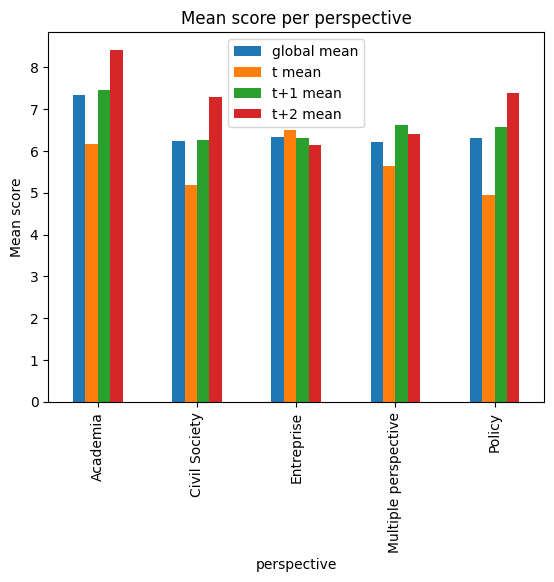

In [154]:
# Plot the distribution of the perspective 
fig, ax = plt.subplots()
summary.plot(kind='bar', ax=ax)
ax.set_ylabel('Mean score')
ax.set_title('Mean score per perspective')
plt.show()


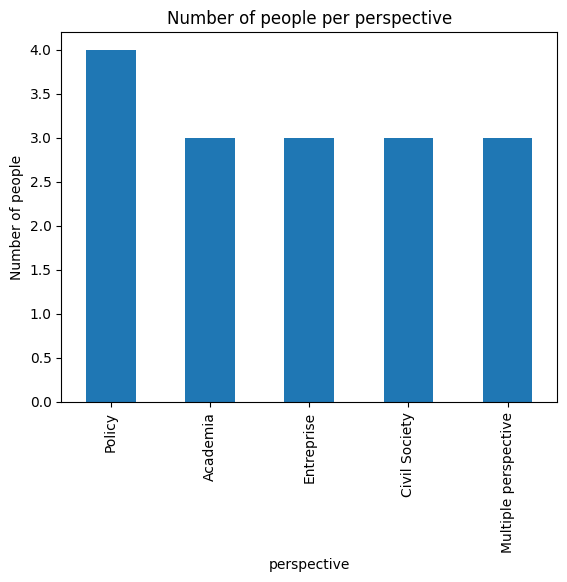

In [155]:
# Plot the distirbution of the number per perspective that fill the survey
fig, ax = plt.subplots()
people['perspective'].value_counts().plot(kind='bar', ax=ax)
ax.set_ylabel('Number of people')
ax.set_title('Number of people per perspective')
plt.show()


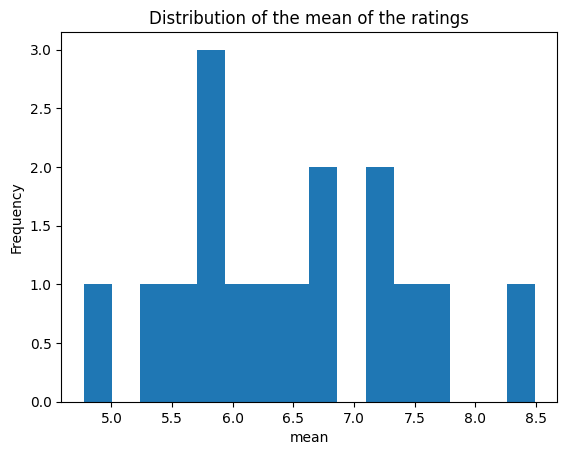

In [144]:
# Plot the distribution of the mean of the ratings
plt.hist(people['global mean'], bins=16)
plt.xlabel('mean')
plt.ylabel('Frequency')
plt.title('Distribution of the mean of the ratings')
plt.show()

In [146]:
summary = people.groupby('perspective').mean()
summary

,global mean,t mean,t+1 mean,t+2 mean
perspective,,,,
Academia,7.345029,6.157895,7.456140,8.421053
Civil Society,6.245614,5.175439,6.263158,7.298246
Entreprise,6.321637,6.508772,6.315789,6.140351
Multiple perspective,6.216374,5.631579,6.614035,6.403509
Policy,6.298246,4.934211,6.565789,7.394737


C:\Users\goali\AppData\Local\Temp\ipykernel_16760\547303954.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary.index, y=summary['global mean'], palette='viridis')


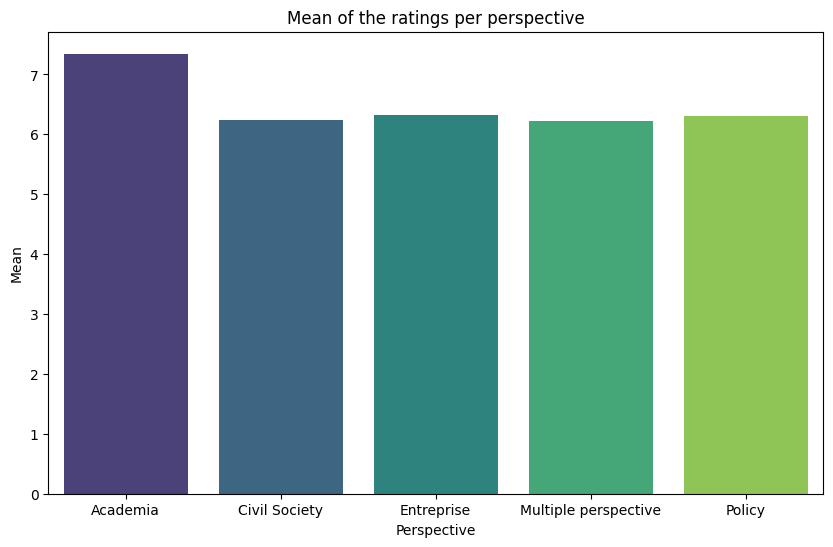

In [147]:
#Plot the mean for each perspective using sns library barplot and change color for each barplot, plot the value of the mean with seaborn
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(x=summary.index, y=summary['global mean'], palette='viridis')
plt.xlabel('Perspective')
plt.ylabel('Mean')
plt.title('Mean of the ratings per perspective')
plt.show()

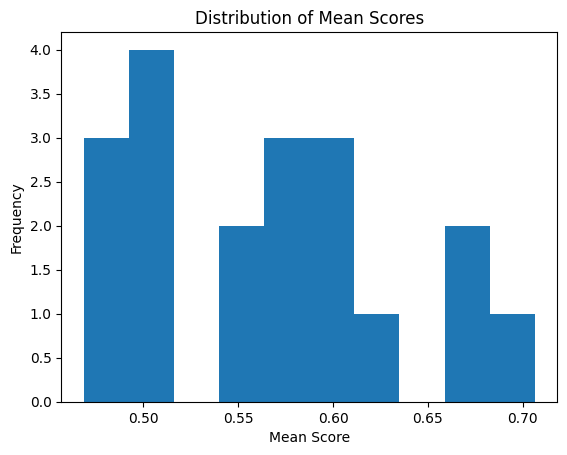

0.5634868421052632

In [149]:
# Plot distribution of mean scores
plt.hist(edges_child['Mean_score'], bins=10)
plt.xlabel('Mean Score')
plt.ylabel('Frequency')
plt.title('Distribution of Mean Scores')
plt.show()

mean_t = edges_child['Mean_score']
mean_t = mean_t.mean()
mean_t

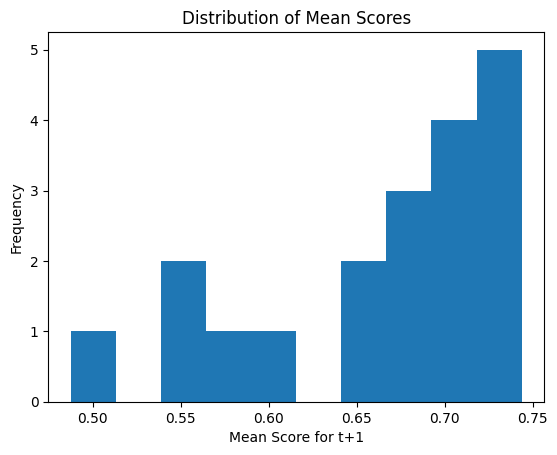

0.6638157894736842

In [150]:
# Plot distribution of mean scores
plt.hist(edges_t1['Mean_score'], bins=10)
plt.xlabel('Mean Score for t+1')
plt.ylabel('Frequency')
plt.title('Distribution of Mean Scores')
plt.show()

mean_t1 = edges_t1['Mean_score']
mean_t1 = mean_t1.mean()
mean_t1

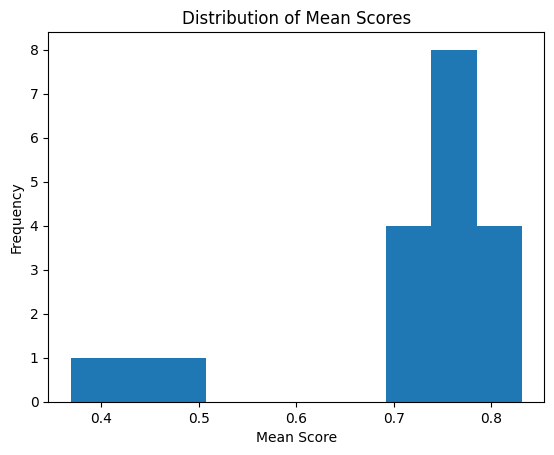

0.7148026315789473

In [151]:
# Plot distribution of mean scores
plt.hist(edges_t2['Mean_score'], bins=10)
plt.xlabel('Mean Score')
plt.ylabel('Frequency')
plt.title('Distribution of Mean Scores')
plt.show()

mean_t2 = edges_t2['Mean_score']
mean_t2 = mean_t2.mean()
mean_t2


In [160]:
edges_child['Mean_score']

25    0.70625
26    0.67500
24    0.66875
22    0.61250
6     0.60625
9     0.58750
21    0.58750
7     0.58125
10    0.57500
20    0.56875
19    0.55000
12    0.54375
3     0.51250
17    0.50625
23    0.50000
0     0.49375
18    0.48125
1     0.48125
2     0.46875
Name: Mean_score, dtype: float64

In [158]:
# sort edges_child by Mean_score
edges_child = edges_child.sort_values(by='Mean_score', ascending=False)

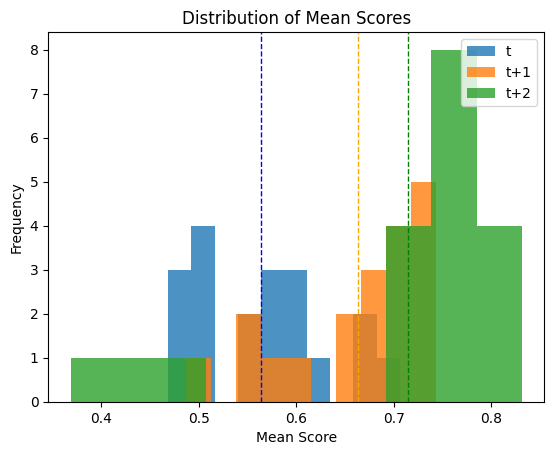

Mean result for survey time t:  0.5634868421052632
Mean result for survey time t+1:  0.6638157894736842
Mean result for survey time t+2:  0.7148026315789473


In [161]:
# Plot the 3 distributions of the mean scores on the same plot 
plt.hist(edges_child['Mean_score'], bins=10, alpha=0.8, label='t')
plt.axvline(mean_t, color='blue', linestyle='dashed', linewidth=1)
plt.hist(edges_t1['Mean_score'], bins=10, alpha=0.8, label='t+1')
plt.axvline(mean_t1, color='orange', linestyle='dashed', linewidth=1)
plt.hist(edges_t2['Mean_score'], bins=10, alpha=0.8, label='t+2')
plt.axvline(mean_t2, color='green', linestyle='dashed', linewidth=1)
plt.xlabel('Mean Score')
plt.ylabel('Frequency')

plt.legend(loc='upper right')
plt.title('Distribution of Mean Scores')
plt.show()

print("Mean result for survey time t: ", mean_t)
print("Mean result for survey time t+1: ", mean_t1)
print("Mean result for survey time t+2: ", mean_t2)


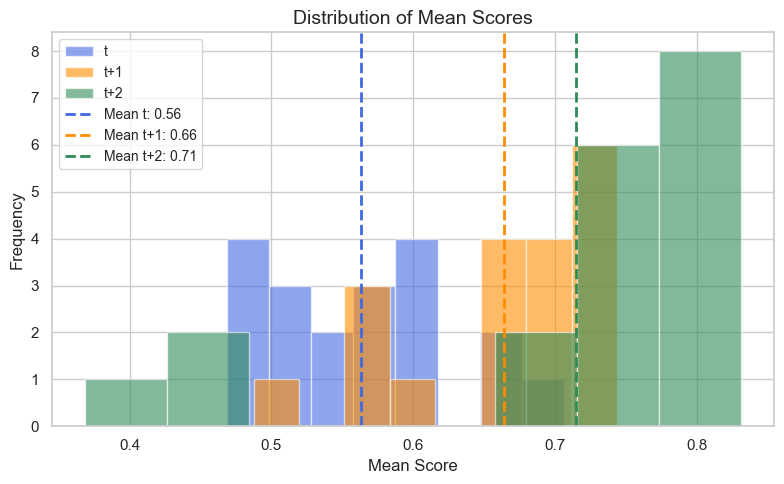

In [162]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use a clean style
sns.set(style="whitegrid")

# Plot histograms with lower alpha for clarity
plt.figure(figsize=(8, 5))
plt.hist(edges_child['Mean_score'], bins=8, alpha=0.6, color='royalblue', label='t')
plt.hist(edges_t1['Mean_score'], bins=8, alpha=0.6, color='darkorange', label='t+1')
plt.hist(edges_t2['Mean_score'], bins=8, alpha=0.6, color='seagreen', label='t+2')

# Add vertical lines for means
plt.axvline(mean_t, color='royalblue', linestyle='--', linewidth=2, label=f'Mean t: {mean_t:.2f}')
plt.axvline(mean_t1, color='darkorange', linestyle='--', linewidth=2, label=f'Mean t+1: {mean_t1:.2f}')
plt.axvline(mean_t2, color='seagreen', linestyle='--', linewidth=2, label=f'Mean t+2: {mean_t2:.2f}')

# Add labels and title
plt.xlabel('Mean Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Mean Scores', fontsize=14)

# Customize legend and layout
plt.legend(loc='best', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()
